### Introduction

In this project, we'll be using a variety of statistical techniques to evaluate a dataset. We'll be assuming we're working for an e-learning company that's looking for the best markets in which to advertise our products and services. We could do by organizing surveys to collect data, but a good first step is to analyze existing data to try and achieve our goal.

The data we'll be using is that collected by freeCodeCamp's 2017 New Coder Survey. The data can be found in [this GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey). How the dataset was acquired is briefly described in [this article](https://medium.freecodecamp.org/take-the-2017-new-coder-survey-and-help-us-build-a-massive-public-dataset-8c808cbee7eb). FreeCodeCamp surveyed thousands of individuals who began coding 5 or fewer years ago, asking them 48 questions from which the dataset was compiled.

In [2]:
import pandas as pd

fcc_data = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv", low_memory = False)

print(fcc_data.shape)
pd.set_option('display.max_columns', None)  
fcc_data.head(3)

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

### Initial Overview of the Dataset

From looking through the column titles in the dataset, we can see that there's some data on the individuals' academic backgrounds, some financial information, their time spent programming, the resources they've made use of to learn to program, their job interests, and of course some personal information.

Since we're looking for the two best markets in which to advertize our products, we're interested in the locations of these individuals (so that we can find locations with a high density of coders). We also want to look at how much they're willing to spend, for which there is a helpful column - "MoneyForLearning". We also want to look at their interests to see which of our products/services to advertize. We can use the "JobRoleInterest" column for this, which will be much easier than looking at the types of resources they tend to make use of (although we could look through that as well if necessary).

### Breaking Down Roles of Interest

Let's start by evaluating the areas in which people are interested in working.

In [3]:
pd.options.display.max_rows = 500
fcc_data["JobRoleInterest"].value_counts(normalize = True) * 100
# 0.014302 is a single response

Full-Stack Web Developer                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                                                                

The data in this table has one major issue. Respondents to the survey could list multiple roles that they were interested in, rather than just one. So, we can see that 11.77% of respondents were only interested in being a Full-Stack Web Developer, but this does not include those that were interested in that role that were interested in other roles as well. This means that this single number alone cannot necessarily be relied upon to tell us what proportion of people are interested in that specific role.

Before we do anything else, let's see what proportion of respondents were interested in only one role. If the proportion is high, we may be ok just moving forward. If it's low, we may want to get a more accurate representation of the population.

In [26]:
roles_no_na = fcc_data["JobRoleInterest"].dropna()

split_interests = roles_no_na.str.split(",")

number_of_options = split_interests.apply(lambda x: len(x))
number_of_options.value_counts(normalize = True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

### Counting Individual Roles

Only 31.7% of respondents replied with interest in only one role. If we only look at this data, therefore, we won't have a very good idea of the survey population at all. Let's do something about this.

We can count how often each role appears in the series, but we can't do this by iterating through the output list of Series.unique(), as this list will include unique responses which list multiple roles.

Another, and better, option is to look at the survey itself for the possible options, create a list from these options and iterate through that list. However, this list of options is not exhaustive as it includes an "Other" category in which respondents can name any role they choose. The "Other" category may have few responses, or it may have many. Hopefully it will have few so that our data is relatively representative.

So, there's no perfect solution, but the latter one is certainly preferable, so let's give it a try.

In [6]:
roles = ["Back-End Web Developer", "User Experience Designer", "Quality Assurance Engineer", "Front-End Web Developer", "DevOps / SysAdmin", "Product Manager", "Mobile Developer", "Information Security", "Data Engineer", "Game Developer", "Full-Stack Web Developer", "Data Scientist"]

role_counts = {}

for role in roles:
    for value in roles_no_na:
        if role in value:
            if role in role_counts:
                role_counts[role] += 1
            else:
                role_counts[role] = 1

role_counts

{'Back-End Web Developer': 2772,
 'User Experience Designer': 1469,
 'Quality Assurance Engineer': 498,
 'Front-End Web Developer': 3534,
 'DevOps / SysAdmin': 927,
 'Product Manager': 814,
 'Mobile Developer': 2304,
 'Information Security': 1326,
 'Data Engineer': 1248,
 'Game Developer': 1628,
 'Full-Stack Web Developer': 4198,
 'Data Scientist': 1643}

Much more useful. Now let's represent these numbers as percentages.

In [10]:
s = sum(role_counts.values())
role_count_pct = {}
for k, v in role_counts.items():
    percent = v * 100 / s
    role_count_pct[k] = percent
role_count_pct

{'Back-End Web Developer': 12.39658333706006,
 'User Experience Designer': 6.569473637136086,
 'Quality Assurance Engineer': 2.227091811636331,
 'Front-End Web Developer': 15.804302133178302,
 'DevOps / SysAdmin': 4.145610661419435,
 'Product Manager': 3.6402665354858907,
 'Mobile Developer': 10.303653682751218,
 'Information Security': 5.929967353875051,
 'Data Engineer': 5.581145744823576,
 'Game Developer': 7.2805330709717815,
 'Full-Stack Web Developer': 18.773757882026743,
 'Data Scientist': 7.347614149635526}

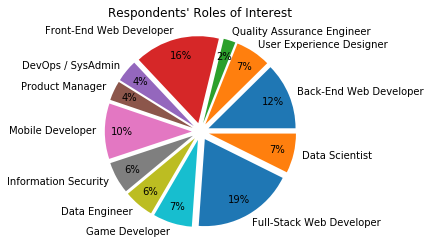

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.pie(x = role_count_pct.values(), labels = role_count_pct.keys(), autopct = "%1.0f%%", pctdistance = 0.8, explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
plt.title("Respondents' Roles of Interest")
plt.show()

We can see easily from this pie chart that the most popular role is full-stack web developer, but that front-end and back-end web developers are also popular. Interestingly, mobile developer is the next most popular role after that - it looks like developer roles are highly desired!

In fact, we can go further and plot a bar graph to see what proportion of individuals are interested in developer roles versus other roles.

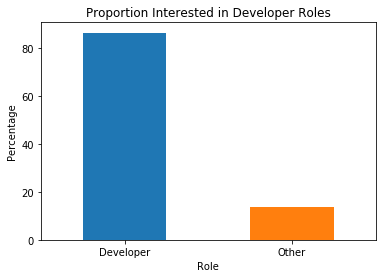

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


In [35]:
developer = roles_no_na.str.contains("Web Developer|Mobile Developer")

developer_count = developer.value_counts(normalize = True) * 100

developer_count.plot.bar()
plt.xlabel("Role")
plt.xticks([0,1], ["Developer", "Other"], rotation = 0)
plt.ylabel("Percentage")
plt.title("Proportion Interested in Developer Roles")
plt.show()

print(developer_count)

Almost 9/10 respondents are interested in developer roles versus other roles. That's a pretty clear indication that we should be marketing to people interested in becoming developers!

### Finding the Best Locations

Now we'll look for the locations where it will be best to market. We'll do this with the "CountyLive" column (unfortunately there does not seem to be any data on which cities in which the respondents lived, despite the fact that we do know the populations of the cities in which they lived). For the most part, we'll be looking for the biggest markets.

Before we dive in, however, we want to make sure that we're targeting markets that we have useful information on (i.e. that have listed roles they're interested in) and which are interested in/can afford to pay for our products. If we were considering re-evaluating our products and prices, we might think about reducing costs to reach a larger market, thereby increasing profit through increased revenue, but we'll ignore this option here.

The products of the company we're working for cost $59 per month, so this gives us a threshold value to filter for in our dataset. We don't have a money per month column yet, but we can create one with the "MoneyForLearning" column and the "MonthsProgramming" column. This will give us an estimate of how much the survey respondents were willing to spend per month.

So, we have our parameters, let's filter our dataset to see what markets will be best.

In [66]:
fcc_data["MonthsProgramming"].replace(0, 1, inplace = True)
fcc_data["MoneyPerMonth"] = fcc_data["MoneyForLearning"] / fcc_data["MonthsProgramming"]

675

In [71]:
fcc_cleaned = fcc_data[(fcc_data["CountryLive"].notnull()) & (fcc_data["MoneyPerMonth"].notnull()) & (fcc_data["JobRoleInterest"].notnull())]
fcc_filtered = fcc_cleaned[fcc_cleaned["MoneyPerMonth"] > 59]
fcc_filtered["CountryLive"].value_counts().head(10)

United States of America    664
India                        75
United Kingdom               43
Canada                       40
Australia                    22
Spain                        21
Poland                       20
Ukraine                      19
Germany                      16
Brazil                       15
Name: CountryLive, dtype: int64

From our survey data, it seems like India and the US are the best coutnries, but Canada and the UK don't seem too far behind.

An alternative way of checking which market will be best to market in is to take the mean of the "MoneyPerMonth" column for each country, and see whether the average student in each country (assuming our sample is representative of the population in those countries) is able/willing to pay the subscription fee. Let's look at this now.

In [72]:
country_means = round(fcc_cleaned.groupby("CountryLive").mean(), 2)
country_means["MoneyPerMonth"][["United States of America", "India", "Canada", "United Kingdom", "Australia", "Spain", "Poland", "Ukraine", "Germany", "Brazil"]]
# There is no quick way to sort by the values, so we can just look at those values for the countries that appeared previously.

CountryLive
United States of America    228.00
India                       135.10
Canada                      113.51
United Kingdom               45.53
Australia                   419.27
Spain                       784.55
Poland                       75.68
Ukraine                      54.31
Germany                      52.08
Brazil                       56.24
Name: MoneyPerMonth, dtype: float64

Ultimately, we got the same top two countries, but there are some interesting results here. Firstly, the UK's monthly spending seems unusually low given the country's prosperity, and is even below the cost of our company's subscriptions. Secondly, and on the same basis, India's monthly spending seems unusually high. Thirdly, respondents from Australia and Spain are willing to spend huge amounts per month. Perhaps this is due to the low numbers of respondents from those countries, but it's still something to take notice of.

### Investigating Outliers

Given that there are some interesting results, let's investigate whether there are significant outliers that are skewing our results.

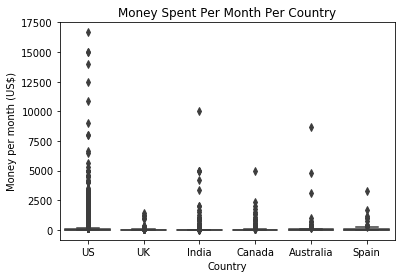

In [78]:
country_data = fcc_cleaned[fcc_cleaned["CountryLive"].str.contains("United States of America|India|United Kingdom|Canada|Australia|Spain")]

import seaborn as sns
sns.boxplot(y = "MoneyPerMonth", x = "CountryLive", data = country_data)
plt.title("Money Spent Per Month Per Country")
plt.ylabel("Money per month (US$)")
plt.xlabel("Country")
plt.xticks(range(6), ["US", "UK", "India", "Canada", "Australia", "Spain"])
plt.show()

Immediately we can see that there are some unusual values for money spent per month. There are two people in the US that spend over 50,000 per month and are clearly outliers, as is the result from Australia of over 20,000, and the result from Spain of over 40,000.

Worth noting is that the outliers from the US haven't skewed the statistics too noticably compared to the outliers from Australia and Spain due to the fact that the sample size for the US is much higher. Nonetheless, we'd like to remove them.

In [76]:
fcc_cleaned = fcc_cleaned[fcc_cleaned["MoneyPerMonth"] < 20000]
country_means = round(fcc_cleaned.groupby("CountryLive").mean(), 2)
country_means["MoneyPerMonth"][["United States of America", "India", "United Kingdom", "Canada", "Australia", "Spain"]]

CountryLive
United States of America    183.80
India                       135.10
United Kingdom               45.53
Canada                      113.51
Australia                   225.40
Spain                       181.24
Name: MoneyPerMonth, dtype: float64

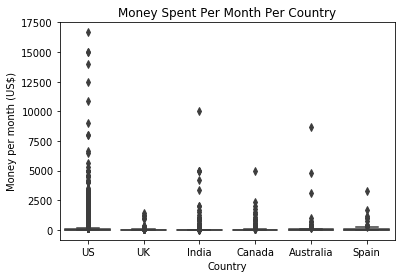

United States of America    47.228489
India                        7.460522
United Kingdom               4.495649
Canada                       3.867225
Poland                       1.965840
Name: CountryLive, dtype: float64


In [85]:
country_data = fcc_cleaned[fcc_cleaned["CountryLive"].str.contains("United States of America|India|United Kingdom|Canada|Australia|Spain")]

import seaborn as sns
sns.boxplot(y = "MoneyPerMonth", x = "CountryLive", data = country_data)
plt.title("Money Spent Per Month Per Country")
plt.ylabel("Money per month (US$)")
plt.xlabel("Country")
plt.xticks(range(6), ["US", "UK", "India", "Canada", "Australia", "Spain"])
plt.show()

print(fcc_cleaned["CountryLive"].value_counts(normalize = True).head(5) * 100)


There are still some likely outliers in this data that we could potentially remove through examining the full dataset further, i.e. the high monthly spending for the US, India, and Australia. However, we'll leave these for now and conclude.

### Conclusion

The US is clearly the best market, as it is not only the largest market by far (if our survey is anything to go by), but the average target in the population is likely to have sufficient monthly spending to afford the subscription fee that our company charges.

When deciding which country is the second best market, the answer is a little trickier to discern. India represents a larger market than Canada, and it appears that most members of the population have sufficiently high monthly spending to afford our company's subscription fees. However, our sample contains some possible outliers in that regard, whereas the distribution for Canada's monthly spending has a smaller spread and only one possible outlier. On balance, though, it seems that India is the second best market to advertize in, mainly due to the increased size of the market (almost twice the size of Canada's).

One factor that may push us in the other direction, however, is the company's knowlege of the cultures in Canada and India. While India represents a potentially more profitable market, if marketing in India is particularly different to marketing in the US, it may be worth it to market to a country that responds to advertising similar to that which is successful in the US. This would both reduce costs on advertising (as there would be no need to design drastically different advertising campaigns) and likely make it more successful. Of course, this is only the case if marketing strategy in India is especially different than that in the US, which may not be the case.